In [2]:
import pandas as pd
import yfinance as yf
import numpy as np


In [3]:
ticker_df = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100")[4]


In [4]:
tickers = ticker_df.Ticker.to_list()

In [5]:
df = yf.download(tickers,start='2015-01-01' )['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  101 of 101 completed


In [6]:
df = df.dropna(axis=1)


In [7]:
mtl =(df.pct_change()+1)[1:].resample('ME').prod()
mtl

Ticker,AAPL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,AMZN,...,SNPS,TMUS,TSLA,TTWO,TXN,VRSK,VRTX,WBD,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-31,1.071618,0.969450,0.938243,0.990875,0.907274,1.027146,0.915065,0.962547,0.952280,1.149131,...,0.997448,1.105494,0.928366,1.057651,1.005676,1.005940,0.894938,0.840777,0.988185,1.039037
2015-02-28,1.100777,1.127905,1.130982,1.076457,1.189409,0.924580,1.101322,1.210117,1.041344,1.072293,...,1.079553,1.094433,0.998723,0.891319,1.100093,1.115929,1.084347,1.114177,1.076013,0.940048
2015-03-31,0.968628,0.934766,1.076187,0.969559,0.912827,0.976902,0.900599,0.861736,1.013505,0.978798,...,0.998061,0.959431,0.928347,0.961117,0.972619,0.994290,0.987775,0.952322,0.987252,0.995929
2015-04-30,1.005786,1.028672,0.981587,0.987156,0.969134,1.011022,0.877217,0.843284,0.987864,1.133513,...,1.012090,1.074156,1.197489,0.930872,0.953729,1.050981,1.045011,1.052016,1.080559,0.974145
2015-05-31,1.045339,1.039837,1.105580,1.011474,0.952842,0.999276,1.022243,1.008850,0.994429,1.017663,...,1.064206,1.142186,1.109489,1.154852,1.031544,0.967217,1.040639,1.048826,0.865256,1.004129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-31,0.918500,0.874521,0.880411,0.974548,0.954743,1.030363,0.918074,1.028840,1.011329,0.896269,...,0.937828,0.988950,0.884565,0.977687,0.916883,1.003952,1.010484,0.936300,0.886800,0.990049
2025-04-30,0.956647,0.977707,0.966529,0.983864,1.047555,0.991489,1.038520,0.947537,0.933783,0.969305,...,1.070328,0.925912,1.088748,1.125790,0.898250,0.996002,1.050905,0.808015,1.049116,0.998729
2025-05-31,0.946416,1.106966,1.097784,1.082934,1.079745,0.963754,1.043034,1.137442,0.999336,1.111647,...,1.010828,0.984385,1.227885,0.969827,1.142455,1.059744,0.867615,1.149942,1.011061,0.991513


In [8]:
def get_rolling_ret(df,n):
    return df.rolling(n).apply(np.prod)

In [9]:
ret_12, ret_6, ret_3 = get_rolling_ret(mtl,12),get_rolling_ret(mtl,6),get_rolling_ret(mtl,3)

In [10]:
top_50 = ret_12.loc['2015-12-31'].nlargest(50).index
top_50

Index(['NFLX', 'AMZN', 'NVDA', 'DXCM', 'SBUX', 'GOOGL', 'AVGO', 'EA', 'PANW',
       'GOOG', 'TMUS', 'MNST', 'META', 'KDP', 'REGN', 'ORLY', 'ADBE', 'TTWO',
       'MDLZ', 'ROP', 'MSFT', 'CDW', 'VRSK', 'COST', 'PAYX', 'CTAS', 'ROST',
       'CCEP', 'CSGP', 'CTSH', 'ANSS', 'BKNG', 'FANG', 'CDNS', 'CHTR', 'MSTR',
       'NXPI', 'TSLA', 'PEP', 'GILD', 'AMD', 'INTU', 'MCHP', 'SNPS', 'HON',
       'TXN', 'ADP', 'ISRG', 'CPRT', 'AMGN'],
      dtype='object', name='Ticker')

In [11]:
top_30 = ret_6.loc['2015-12-31', top_50].nlargest(30).index
top_30

Index(['NVDA', 'AMZN', 'GOOG', 'GOOGL', 'KDP', 'MSFT', 'TTWO', 'CDW', 'META',
       'NFLX', 'COST', 'AMD', 'ADBE', 'PAYX', 'CCEP', 'ISRG', 'SBUX', 'ORLY',
       'ROST', 'MNST', 'BKNG', 'ROP', 'AVGO', 'MDLZ', 'PEP', 'TXN', 'CTAS',
       'CPRT', 'CHTR', 'ADP'],
      dtype='object', name='Ticker')

In [12]:
top_10 = ret_3.loc['2015-12-31', top_30].nlargest(10).index
top_10

Index(['AMD', 'NVDA', 'AMZN', 'MSFT', 'GOOG', 'GOOGL', 'ROP', 'TTWO', 'ISRG',
       'KDP'],
      dtype='object', name='Ticker')

In [13]:
def get_top(date):
    top_50 = ret_12.loc[date].nlargest(50).index
    top_30 = ret_6.loc[date, top_50].nlargest(30).index
    top_10 = ret_3.loc[date, top_30].nlargest(10).index
    return top_10

In [14]:
get_top('2015-12-31')

Index(['AMD', 'NVDA', 'AMZN', 'MSFT', 'GOOG', 'GOOGL', 'ROP', 'TTWO', 'ISRG',
       'KDP'],
      dtype='object', name='Ticker')

In [15]:
portfolio = mtl.loc['2015-12-31':, get_top('2015-12-31')][1:2]

In [16]:
portfolio.mean(axis=1).values[0]

np.float64(0.9394463859112813)

In [17]:
def pf_performance(date):
    portfolio = mtl.loc[date:, get_top(date)][1:2]
    return portfolio.mean(axis=1)



In [18]:
pf_performance('2015-12-31')

Date
2016-01-31    0.939446
Freq: ME, dtype: float64

In [19]:
mtl.index[:-1]

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31',
               ...
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
               '2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30',
               '2025-05-31', '2025-06-30'],
              dtype='datetime64[ns]', name='Date', length=126, freq='ME')

In [20]:
returns = []
for date in mtl.index[:-1]:
    returns.append(pf_performance(date))



In [21]:
returns

[Date
 2015-02-28    1.097519
 Freq: ME, dtype: float64,
 Date
 2015-03-31    0.959351
 Freq: ME, dtype: float64,
 Date
 2015-04-30    0.989082
 Freq: ME, dtype: float64,
 Date
 2015-05-31    1.029012
 Freq: ME, dtype: float64,
 Date
 2015-06-30    0.972377
 Freq: ME, dtype: float64,
 Date
 2015-07-31    1.040977
 Freq: ME, dtype: float64,
 Date
 2015-08-31    0.956717
 Freq: ME, dtype: float64,
 Date
 2015-09-30    0.966585
 Freq: ME, dtype: float64,
 Date
 2015-10-31    1.08989
 Freq: ME, dtype: float64,
 Date
 2015-11-30    1.002002
 Freq: ME, dtype: float64,
 Date
 2015-12-31    1.032756
 Freq: ME, dtype: float64,
 Date
 2016-01-31    0.939446
 Freq: ME, dtype: float64,
 Date
 2016-02-29    0.991151
 Freq: ME, dtype: float64,
 Date
 2016-03-31    1.076732
 Freq: ME, dtype: float64,
 Date
 2016-04-30    0.994572
 Freq: ME, dtype: float64,
 Date
 2016-05-31    1.098211
 Freq: ME, dtype: float64,
 Date
 2016-06-30    1.016936
 Freq: ME, dtype: float64,
 Date
 2016-07-31    1.075284
 F

In [22]:
raw = pd.Series(returns, index=mtl.index[1:]).cumprod()

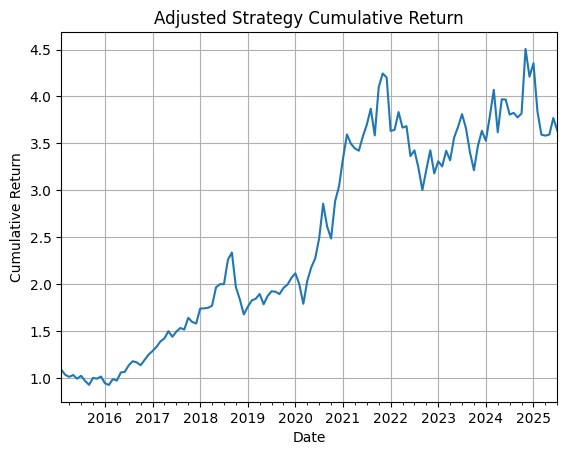

In [23]:
import matplotlib.pyplot as plt
# one‐liner: build float Series, cumprod, and plot
pd.Series(
    [r.values[0] - 0.01 for r in returns],      # unwrap each 1‑element Series
    index=mtl.index[1:], 
    name='cum_ret'
).cumprod().plot()

plt.title('Adjusted Strategy Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()


